In [1]:
from google.colab import files

uploaded = files.upload()

Saving netflix-stocks-data.csv to netflix-stocks-data.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix-stocks-data.csv')



In [3]:
df.head(20)

,Date,Close/Last,Volume,Open,High,Low
0,07/17/2020,$492.99,24991350,$494.87,$503.59,$484.14
1,07/16/2020,$527.39,24498990,$526.48,$535.54,$504.3627
2,07/15/2020,$523.26,10066650,$516.3,$529,$510.18
3,07/14/2020,$524.88,15083300,$517.08,$525.5,$490.49
4,07/13/2020,$525.5,18399020,$567.98,$575.37,$520.96
5,07/10/2020,$548.73,21605590,$519.73,$555.8799,$511.28
6,07/09/2020,$507.76,5840541,$508.4,$510,$495.78
7,07/08/2020,$502.78,5691682,$498.576,$505.1,$493.81
8,07/07/2020,$493.16,5669870,$497.311,$504.82,$490.83
9,07/06/2020,$493.81,7838990,$480.77,$499.5,$479.8


In [4]:
df.isnull().sum()

Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

In [5]:
df.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [6]:
df = df[["Date", " Close/Last"]]

In [7]:
df

,Date,Close/Last
0,07/17/2020,$492.99
1,07/16/2020,$527.39
2,07/15/2020,$523.26
3,07/14/2020,$524.88
4,07/13/2020,$525.5
...,...,...
2512,07/26/2010,$14.6843
2513,07/23/2010,$15.3857
2514,07/22/2010,$14.7943
2515,07/21/2010,$17.0929


In [8]:
df = df.rename(columns = {'Date': 'date', ' Close/Last': "close"})


In [9]:
df

,date,close
0,07/17/2020,$492.99
1,07/16/2020,$527.39
2,07/15/2020,$523.26
3,07/14/2020,$524.88
4,07/13/2020,$525.5
...,...,...
2512,07/26/2010,$14.6843
2513,07/23/2010,$15.3857
2514,07/22/2010,$14.7943
2515,07/21/2010,$17.0929


In [10]:
df['close'] = df['close'].str.replace("$", '')


In [11]:
df

,date,close
0,07/17/2020,492.99
1,07/16/2020,527.39
2,07/15/2020,523.26
3,07/14/2020,524.88
4,07/13/2020,525.5
...,...,...
2512,07/26/2010,14.6843
2513,07/23/2010,15.3857
2514,07/22/2010,14.7943
2515,07/21/2010,17.0929


In [12]:
df['date']=pd.to_datetime(df['date'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2517 non-null   datetime64[ns]
 1   close   2517 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 39.5+ KB


In [14]:
df.set_index("date", inplace=True)

In [15]:
df.head()

,close
date,
2020-07-17,492.99
2020-07-16,527.39
2020-07-15,523.26
2020-07-14,524.88
2020-07-13,525.5


In [16]:
df["close"] =df["close"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2020-07-17 to 2010-07-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [18]:
df

,close
date,
2020-07-17,492.9900
2020-07-16,527.3900
2020-07-15,523.2600
2020-07-14,524.8800
2020-07-13,525.5000
...,...
2010-07-26,14.6843
2010-07-23,15.3857
2010-07-22,14.7943


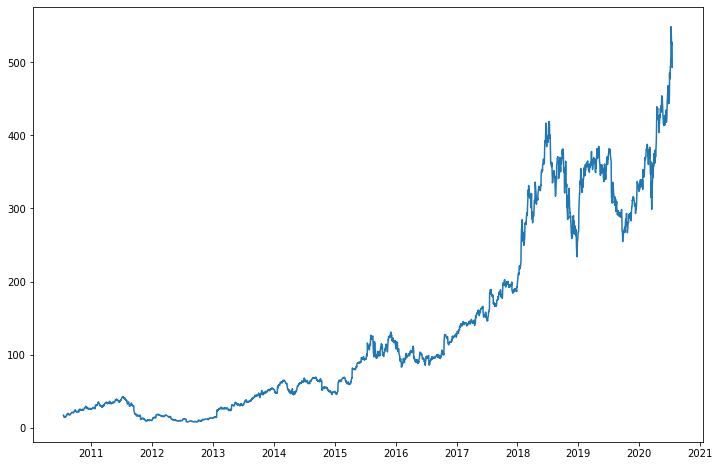

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))


plt.plot("close", data=df)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
test_result=adfuller(df['close'])


In [22]:
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(df['close'])


ADF Test Statistic : -2.3171134560949835
p-value : 0.16650793004714354
#Lags Used : 27
Number of Observations Used : 2489
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
df['close difference']=df['close']-df['close'].shift(30)


In [25]:
adfuller_test(df['close difference'].dropna())


ADF Test Statistic : -8.684979819519864
p-value : 4.1870112113546216e-14
#Lags Used : 27
Number of Observations Used : 2459
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


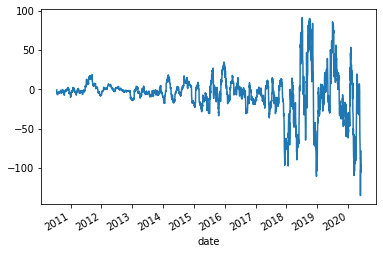

In [26]:
df['close difference'].plot()

In [24]:
df['close_log'] = df['close'].apply(lambda x: np.log(x))


In [25]:
df

,close,close_log
date,,
2020-07-17,492.9900,6.200489
2020-07-16,527.3900,6.267940
2020-07-15,523.2600,6.260078
2020-07-14,524.8800,6.263170
2020-07-13,525.5000,6.264350
...,...,...
2010-07-26,14.6843,2.686779
2010-07-23,15.3857,2.733439
2010-07-22,14.7943,2.694242


In [26]:
df['close_log_difference']=df['close_log']-df['close_log'].shift(30)


In [27]:
df

,close,close_log,close_log_difference
date,,,
2020-07-17,492.9900,6.200489,NaN
2020-07-16,527.3900,6.267940,NaN
2020-07-15,523.2600,6.260078,NaN
2020-07-14,524.8800,6.263170,NaN
2020-07-13,525.5000,6.264350,NaN
...,...,...,...
2010-07-26,14.6843,2.686779,-0.321657
2010-07-23,15.3857,2.733439,-0.251379
2010-07-22,14.7943,2.694242,-0.287102


In [28]:
adfuller_test(df['close_log_difference'].dropna())


ADF Test Statistic : -8.367691241489982
p-value : 2.7148327677128136e-13
#Lags Used : 25
Number of Observations Used : 2461
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


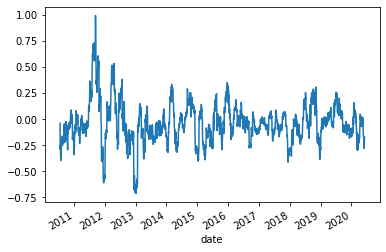

In [29]:
df["close_log_difference"].plot()

In [32]:
df = df.drop(columns={"close","close_log"})

In [35]:
df = df["close_log_difference"]

In [34]:
df = df.rename(columns = {'close_log_difference': "y"})



In [48]:
df

,date,y
0,2020-06-03,-0.223006
1,2020-06-02,-0.202569
2,2020-06-01,-0.208918
3,2020-05-29,-0.224739
4,2020-05-28,-0.283094
...,...,...
2481,2010-07-26,-0.321657
2482,2010-07-23,-0.251379
2483,2010-07-22,-0.287102
2484,2010-07-21,-0.120073


In [47]:
df.reset_index(inplace=True)

In [38]:
df =df.iloc[31:]

In [49]:
df

,date,y
0,2020-06-03,-0.223006
1,2020-06-02,-0.202569
2,2020-06-01,-0.208918
3,2020-05-29,-0.224739
4,2020-05-28,-0.283094
...,...,...
2481,2010-07-26,-0.321657
2482,2010-07-23,-0.251379
2483,2010-07-22,-0.287102
2484,2010-07-21,-0.120073


In [40]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

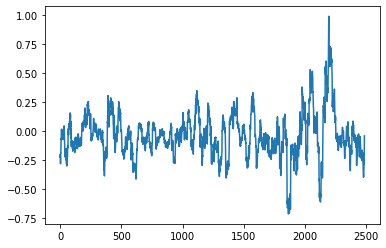

In [50]:
df["y"].plot()

In [42]:
m =Prophet()
m.fit(df)

ValueError: ignored

In [52]:
df = df.rename(columns = {'date': "ds"})


In [53]:
df

,ds,y
0,2020-06-03,-0.223006
1,2020-06-02,-0.202569
2,2020-06-01,-0.208918
3,2020-05-29,-0.224739
4,2020-05-28,-0.283094
...,...,...
2481,2010-07-26,-0.321657
2482,2010-07-23,-0.251379
2483,2010-07-22,-0.287102
2484,2010-07-21,-0.120073


In [68]:
m =Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
future = m.make_future_dataframe(periods=360)

In [70]:
future.tail()

,ds
2841,2021-05-25
2842,2021-05-26
2843,2021-05-27
2844,2021-05-28
2845,2021-05-29


In [71]:
forecast = m.predict(future)

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-20,-0.130394,-0.287573,0.147626,-0.130394,-0.130394,0.054147,0.054147,0.054147,-0.016883,-0.016883,-0.016883,0.071029,0.071029,0.071029,0.0,0.0,0.0,-0.076247
1,2010-07-21,-0.129801,-0.291143,0.136073,-0.129801,-0.129801,0.048117,0.048117,0.048117,-0.020237,-0.020237,-0.020237,0.068354,0.068354,0.068354,0.0,0.0,0.0,-0.081684
2,2010-07-22,-0.129208,-0.288350,0.130744,-0.129208,-0.129208,0.049076,0.049076,0.049076,-0.016604,-0.016604,-0.016604,0.065681,0.065681,0.065681,0.0,0.0,0.0,-0.080131
3,2010-07-23,-0.128614,-0.294254,0.134340,-0.128614,-0.128614,0.044045,0.044045,0.044045,-0.019016,-0.019016,-0.019016,0.063062,0.063062,0.063062,0.0,0.0,0.0,-0.084569
4,2010-07-26,-0.126834,-0.294727,0.119600,-0.126834,-0.126834,0.039408,0.039408,0.039408,-0.016601,-0.016601,-0.016601,0.056009,0.056009,0.056009,0.0,0.0,0.0,-0.087426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,2021-05-25,-0.008087,-0.284762,0.140701,-0.038134,0.023140,-0.061774,-0.061774,-0.061774,-0.016883,-0.016883,-0.016883,-0.044891,-0.044891,-0.044891,0.0,0.0,0.0,-0.069861
2842,2021-05-26,-0.008076,-0.275413,0.142158,-0.038295,0.023331,-0.065523,-0.065523,-0.065523,-0.020237,-0.020237,-0.020237,-0.045286,-0.045286,-0.045286,0.0,0.0,0.0,-0.073599
2843,2021-05-27,-0.008065,-0.262479,0.146395,-0.038358,0.023443,-0.062021,-0.062021,-0.062021,-0.016604,-0.016604,-0.016604,-0.045417,-0.045417,-0.045417,0.0,0.0,0.0,-0.070086
2844,2021-05-28,-0.008054,-0.281606,0.154279,-0.038590,0.023554,-0.064296,-0.064296,-0.064296,-0.019016,-0.019016,-0.019016,-0.045280,-0.045280,-0.045280,0.0,0.0,0.0,-0.072351


In [59]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2841,2021-05-25,-0.069861,-0.290585,0.147594
2842,2021-05-26,-0.073599,-0.278778,0.137001
2843,2021-05-27,-0.070086,-0.287079,0.127053
2844,2021-05-28,-0.072351,-0.278332,0.149880
2845,2021-05-29,-0.008247,-0.231995,0.200215


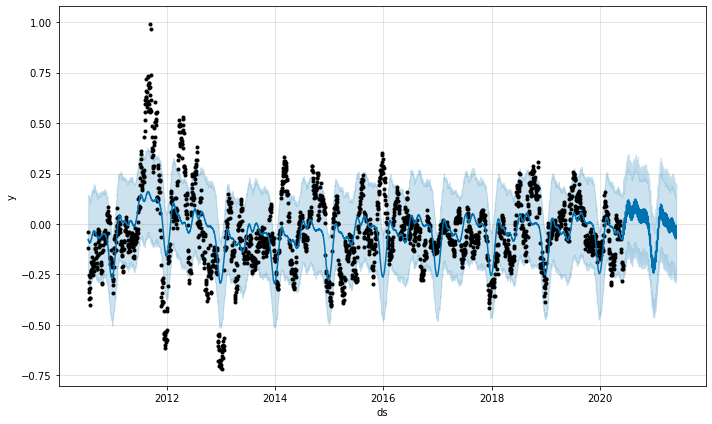

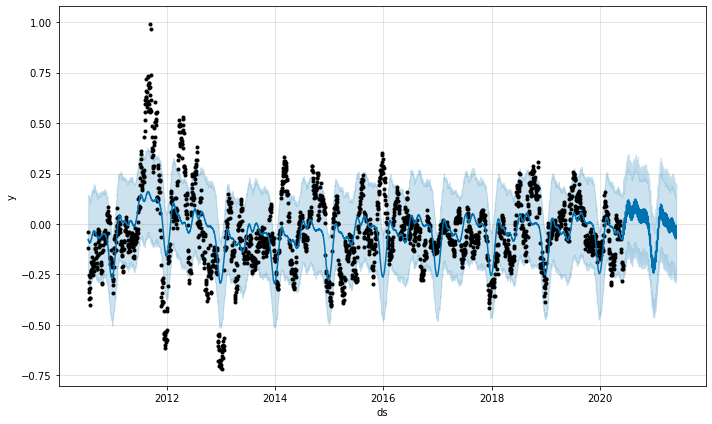

In [61]:
m.plot(forecast)

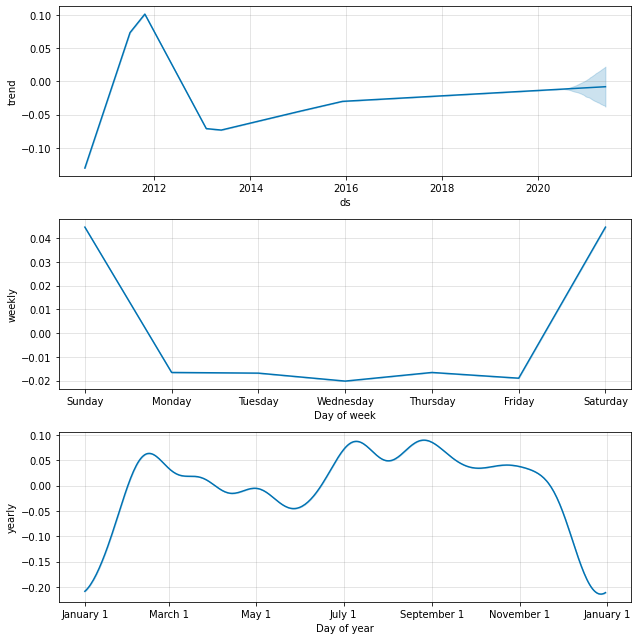

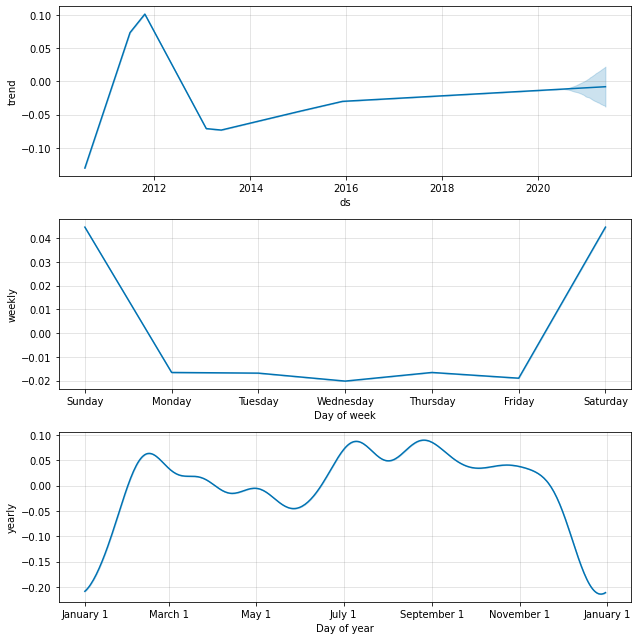

In [64]:
m.plot_components(forecast)